## Importing Libraries

In [1]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning) #turn off irrelevant scipy future warning 
import heartbeat as hb
import normalizer
import importlib
import random 
import time 
import pandas as pd 
import numpy as np
from collections import Counter
from scipy import signal
from scipy.signal import find_peaks, resample
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
from os import listdir
from os.path import isfile, join
import sys
import warnings 
importlib.reload(hb)
importlib.reload(normalizer)

print('Packages Loaded')

Packages Loaded


## Plotting test sample

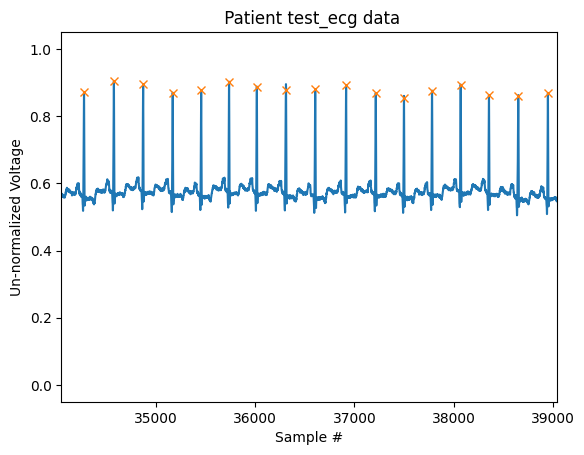

In [2]:
patient = 'test_ecg'
#patient=random.choice(hb.all_patients())
hb.get_custom_patient_data(patient,norm=True,sample_plot=True)
plt.ylabel('Un-normalized Voltage')
plt.xlabel('Sample #')
plt.draw()

## Normalizing Data Points

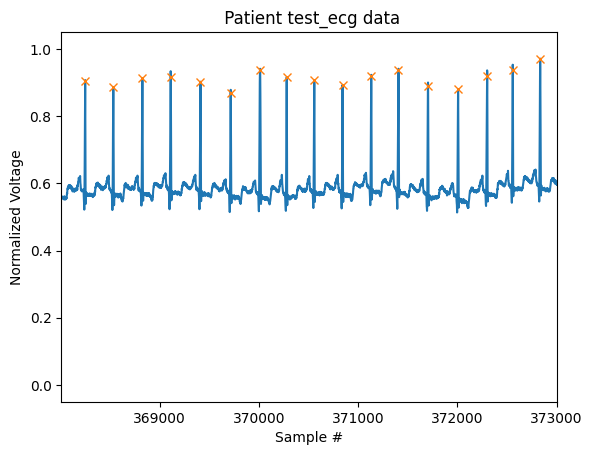

In [3]:
hb.get_custom_patient_data(patient,norm=True,sample_plot=True)
plt.ylabel('Normalized Voltage')
plt.xlabel('Sample #')
plt.draw()

## Defining Classes and Class Reducer

In [4]:
print('Specific_classes to be examined:\n')
classes= {0:'N',1:'L',2:'R',3:'V',4:'/',5:'A',6:'f',7:'F',8:'!',9:'j',10:'x',11:'a',12:'|',13:'E',14:'J',15:'Q',16:'e',17:'[',18:']',19:'S'}
classes= {0:'N',1:'A'}
classes_reducer={'N':['N'],
                 'A':['A','a','J','S','V']}
for c, subclass in classes_reducer.items():
    print('For class:',c, '({})'.format(hb.classes_further[c]))
    for i in subclass:
        print("  ({})".format(i), hb.classes_further[i])

Specific_classes to be examined:

For class: N (Normal beat)
  (N) Normal beat
For class: A (Atrial premature beat)
  (A) Atrial premature beat
  (a) Aberrated atrial premature beat
  (J) Nodal (junctional) premature beat
  (S) Supraventricular premature beat
  (V) Premature ventricular contraction


## Applying Heartbeat Isolation Algorithm


Padding...


Average HR Sample Len: 289.01 samples (0.80s per beat)
Average HR: 75.54 bpm
Plotting...



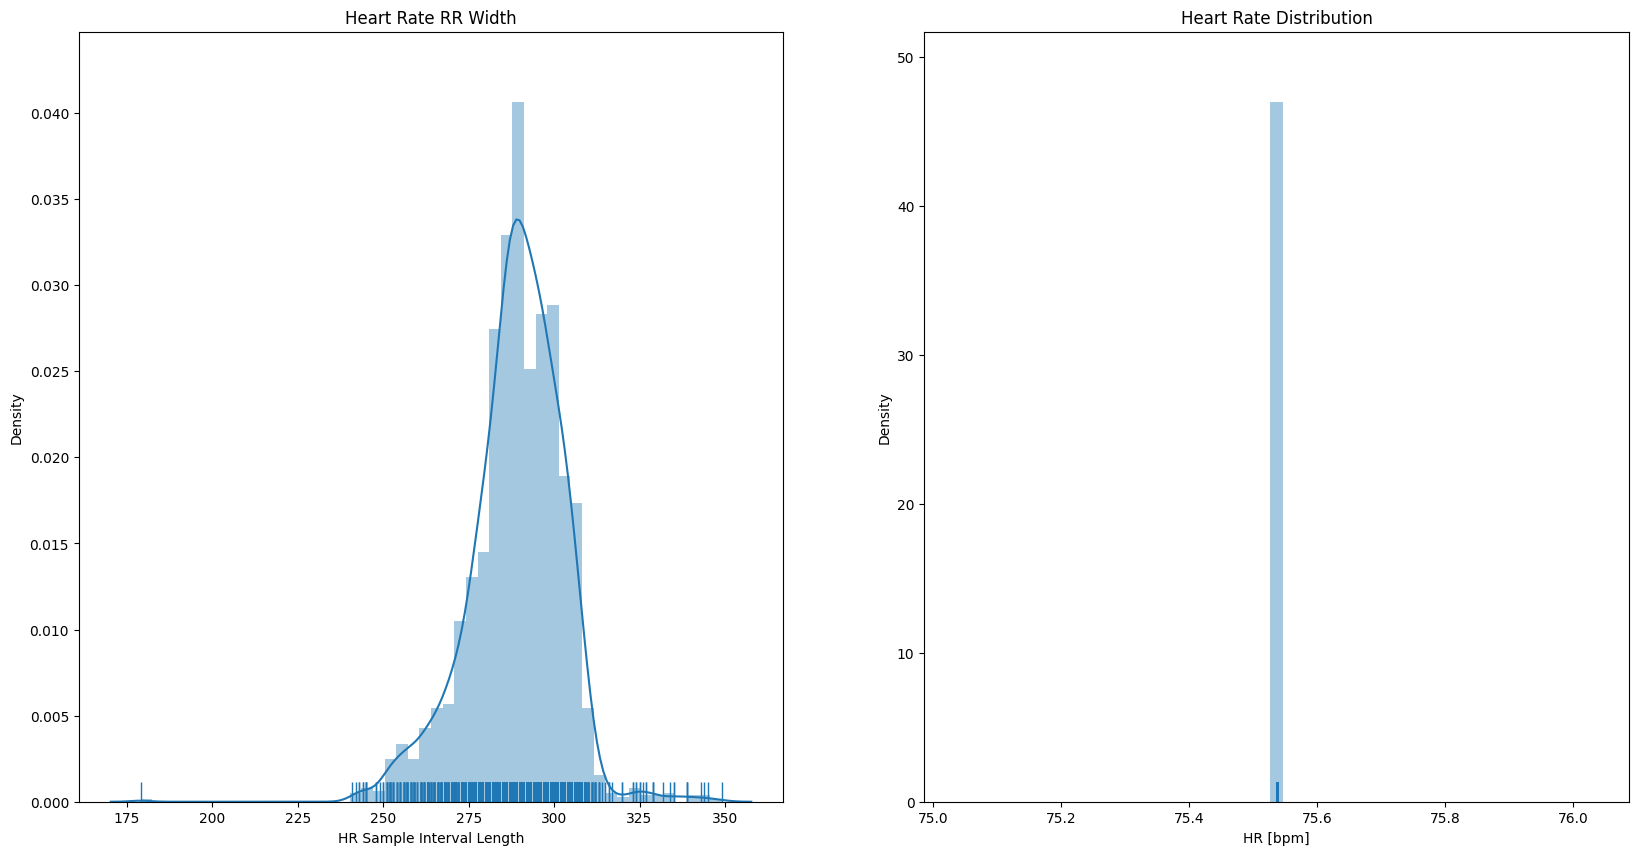

Data Loaded | Shape:(2272, 349)

    2238 cases of Normal beat

    34 cases of Atrial premature beat

0.06min Runtime
X shape: (2272, 346)
y shape: (2272, 3)
sample y vals:: [patient_id, Average Heart Rate, Condition Class]: ['test_ecg' '75.536676138855' 'N']
sample y vals:: [patient_id, Average Heart Rate, Condition Class]: ['test_ecg' '75.536676138855' 'N']


In [5]:
#isolation algorithim heart beat data 
X,y,isolated_beat= hb.isolate_custom_patient_data(patient='test_ecg',classes=classes,
                    classes_further=hb.classes_further, classes_reducer=classes_reducer, 
                     min_HR= 40,max_HR= 140,fs=360,verbose=False,plot_figs=True)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("sample y vals:: [patient_id, Average Heart Rate, Condition Class]:",y[0])
print("sample y vals:: [patient_id, Average Heart Rate, Condition Class]:",y[2044])

## Resampling from 360 Hz to (360/2) = 180  Hz

In [6]:
# Cut Roughly in Half 
print('Resampling...\n')
X_resamp=hb.resample_vals(X,samp_len=187)
print("X_resamp shape:", X_resamp.shape)
print("y shape:", y.shape)

pd.DataFrame(X_resamp).to_csv("Test/X_resamp.csv")
pd.DataFrame(y).to_csv("Test/y.csv")

print(X_resamp)
print(y)

Resampling...

X_resamp shape: (2272, 187)
y shape: (2272, 3)
[[ 0.44900281  0.62430665  0.56733888 ... -0.01520172  0.02178921
  -0.03858767]
 [ 0.45494894  0.62467315  0.565004   ... -0.01430516  0.02100152
  -0.03799745]
 [ 0.44775605  0.62077582  0.55915141 ... -0.01506911  0.02161351
  -0.03833959]
 ...
 [ 0.45332397  0.62937014  0.56248446 ... -0.01206419  0.018842
  -0.03594901]
 [ 0.44496471  0.61506357  0.55639033 ... -0.01449558  0.02100811
  -0.03761871]
 [ 0.46198161  0.63124428  0.57495587 ... -0.01541089  0.02215639
  -0.03932499]]
[['test_ecg' '75.536676138855' 'N']
 ['test_ecg' '75.536676138855' 'N']
 ['test_ecg' '75.536676138855' 'N']
 ...
 ['test_ecg' '75.536676138855' 'A']
 ['test_ecg' '75.536676138855' 'A']
 ['test_ecg' '75.536676138855' 'A']]


# Predicting on the user input file

In [7]:
####Get (Processed Data) into Google Drive 
#from google.colab import drive
#drive.mount('/content/gdrive')
import pandas as pd 
import numpy as np 
from random import choices
from collections import Counter 


X_resamp= pd.read_csv('Test/X_resamp.csv')
y= pd.read_csv('Test/y.csv')

X_resamp=X_resamp.drop(X_resamp.columns[0],axis=1).values
y=y.drop(y.columns[0],axis=1).values

In [8]:
classes={0: 'N', 1: 'A'}
print('X (resampled):',X_resamp.shape,'y:',y.shape,'Classes:',classes)

def get_key(val,my_dict): 
    """
    Simple Function to Get Key 
    in Dictionary from val. 
    
    Input: Key, Dictionary 
    Output: Val
    
    """
    for key, value in my_dict.items(): 
         if val == value: 
            return key 
    return "key doesn't exist"

def one_hot(c,classes=classes):
    """
    Simple one hot encoding for the 
    types of arrthymia conditions. 
    
    class --> encode class
    'N' --> [1, 0, 0, 0, 0, 0, 0, 0]
    
    c:: current class of the object
    classes:: classes dictionary 
        
    """
    enc=np.zeros(len(classes),dtype=int).tolist()
    enc[get_key(c,classes)]= 1
    return enc

X (resampled): (2272, 187) y: (2272, 3) Classes: {0: 'N', 1: 'A'}


## Load test_ecg file into Testloader

In [9]:
from Anomaly_Classifier import Anomaly_Classifier
from Anomaly_Classifier import *
from evaluation import *
import torch
import torch.nn as nn
import torch.nn.functional as F

cpu

A 1D CNN is very effective when you expect to derive interesting features from shorter 
(fixed-length) segments of the overall data set and where the location of the feature 
within the segment is not of high relevance.

Model Architecture Init

OPTIMIZER = optim.Adam(anom_classifier.parameters(),lr = 0.001) 
 
Functions Ready


In [10]:
X_resamp = X_resamp.astype(np.float32)
X_resamp

array([[ 0.4490028 ,  0.6243066 ,  0.5673389 , ..., -0.01520172,
         0.02178921, -0.03858767],
       [ 0.45494893,  0.6246731 ,  0.565004  , ..., -0.01430516,
         0.02100153, -0.03799745],
       [ 0.44775605,  0.6207758 ,  0.5591514 , ..., -0.01506911,
         0.02161351, -0.03833959],
       ...,
       [ 0.45332396,  0.62937015,  0.56248444, ..., -0.01206419,
         0.018842  , -0.03594901],
       [ 0.4449647 ,  0.61506355,  0.55639035, ..., -0.01449558,
         0.02100811, -0.03761871],
       [ 0.4619816 ,  0.6312443 ,  0.5749559 , ..., -0.01541089,
         0.02215639, -0.03932498]], dtype=float32)

In [11]:
import warnings
from torch.utils.data.sampler import WeightedRandomSampler
import torch
from torch import optim 
import random
import torch.utils.data
from torch.utils.data.sampler import SubsetRandomSampler
import random
from torch.autograd import Variable

def imbalanced_loader(X_test, batch_size=512): # Split train into train + validation 
    """
    Get trainloader, validloader, and testloader for model training. This 
    creates equal training batches but naturally balanced validation and testing 
    sets. Note the testing set was previously augmented to get better per class metrics 
    
    Outputs: dataloader + testloader, where dataloader =  {"train": trainloader, "val": validloader}

    """

    testset=[]
    for i, x in enumerate(X_test):
        #print("i = ",type(i))
        #print('x = ', x)
        #label = y_test[i].astype(np.float32)  # Convert label to a compatible data type
        testset.append((torch.from_numpy(x)))
    print(len(testset))
    
    #testloader = torch.utils.data.DataLoader(dataset = testDataset, batch_size=batch_size, shuffle=False, num_workers=1) 
    testloader = torch.utils.data.DataLoader(testset, batch_size=512,
                                           shuffle=False, num_workers=1)

    print("")
    #dataloader = {"train": trainloader, "val": validloader}
    #print(len(dataloader['train'].dataset))
    print('Test Size Batched=',len(testloader))
    
    warnings.resetwarnings()
    return testloader
  
#batch_size=512
#batch_size = 100
testloader = imbalanced_loader(X_test=X_resamp, batch_size=512)

2272

Test Size Batched= 5


In [12]:
#print(testloader.data)
import itertools    
batch_size = 2

sample_at = 5
k = int(np.floor(sample_at/batch_size))

my_sample = next(itertools.islice(testloader, k, None))
print (my_sample)

tensor([[ 0.4591,  0.6289,  0.5709,  ..., -0.0157,  0.0224, -0.0395],
        [ 0.4552,  0.6271,  0.5682,  ..., -0.0138,  0.0205, -0.0375],
        [ 0.4563,  0.6265,  0.5647,  ..., -0.0148,  0.0215, -0.0386],
        ...,
        [ 0.4433,  0.6170,  0.5563,  ..., -0.0123,  0.0189, -0.0355],
        [ 0.4400,  0.6127,  0.5469,  ..., -0.0115,  0.0181, -0.0346],
        [ 0.4459,  0.6159,  0.5574,  ..., -0.0159,  0.0224, -0.0390]])


In [13]:
weights_path = "D:\\Internship\\1b. Heart Disease Prediction V3\\ECG_Classification_Pytorch\\trained_weights.pth"

In [14]:
#Anomaly_Classifier(input_size=1,num_classes= 2).apply(reset_weights)
#print('Weights Reset')
anom_classifier= Anomaly_Classifier(input_size=1,num_classes= 2)

anom_classifier.load_state_dict(torch.load(weights_path))
anom_classifier.eval()

# Test the model on data
# Assuming you have a test_loader containing the test data
with torch.no_grad():
    preds = evaluate(testloader, anom_classifier, verbose=True)

In [20]:
#print("Number of 1s:", preds.count(1))

In [19]:
def arrhythmia_checker(lst):
    if any(item == 1 for item in lst):
        return "Arrhythmia is present"
    else:
        return "Heartbeats are Normal"
arrhythmia_checker(preds)

'Arrhythmia is present'